In [1]:
# json
import json

# math
import math

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random libraries and seeds:
import random
random.seed(2)
np.random.seed(2)

pd.set_option('display.max_columns', None)

In [2]:
# From: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
data = pd.read_csv("terrorism_cleaned_group.csv")

In [4]:
data = pd.get_dummies(data, columns = ["attacktype1_txt",
                     "targtype1_txt",
                     "weaptype1_txt",
                     "natlty1_txt",
                     "weaptype1_txt",
                     "weapsubtype1_txt"])

In [5]:
data["gname"].value_counts()

Other                                                                        14695
Taliban                                                                       4762
Shining Path (SL)                                                             4134
Islamic State of Iraq and the Levant (ISIL)                                   2372
Farabundo Marti National Liberation Front (FMLN)                              2129
Revolutionary Armed Forces of Colombia (FARC)                                 2037
Basque Fatherland and Freedom (ETA)                                           1903
Irish Republican Army (IRA)                                                   1884
Boko Haram                                                                    1700
Communist Party of India - Maoist (CPI-Maoist)                                1612
New People's Army (NPA)                                                       1506
Al-Shabaab                                                                    1360
Nati

In [6]:
data.shape

(52375, 263)

In [7]:
data["region_txt"].value_counts()

South Asia                     11616
South America                  10886
Middle East & North Africa      8274
Western Europe                  7167
Sub-Saharan Africa              5603
Central America & Caribbean     3852
Southeast Asia                  3374
North America                   1118
Eastern Europe                   217
East Asia                        161
Australasia & Oceania             58
Central Asia                      49
Name: region_txt, dtype: int64

In [8]:
def plotCorrelations(data):
    plt.figure(figsize=(8, 6), dpi=500)
    corr = data.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    
#plotCorrelations(data)

In [17]:
import sklearn.model_selection as mds
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

predictions = []

for region in data["region_txt"].unique():
    data_region = data[data["region_txt"] == region]
    
    #(60% - train set, 20% - validation set, 20% - test set):
    train, validate, test = np.split(data_region.sample(frac=1), [int(.6*len(data_region)), int(.8*len(data_region))])
    
    X_train = train.drop(["gname", "region_txt"], axis=1)
    Y_train = train["gname"]
    
    X_val = validate.drop(["gname", "region_txt"], axis=1)
    Y_val = validate["gname"]
    
    X_test = test.drop(["gname", "region_txt"], axis=1)
    Y_test = test["gname"]
    
    # 70% train, 30% test
    #msk = np.random.rand(len(data_region)) < 0.7
    
    #X_train = X[msk]
    #Y_train = Y[msk]
    
    #X_test = X[~msk]
    #Y_test = Y[~msk]
    
    Y_pred = OneVsRestClassifier(RandomForestClassifier(random_state=2)).fit(X_train, Y_train).predict(X_val)
    
    print("%s, %d/%d => %s" % (region, sum(Y_pred == Y_val), len(Y_pred), (sum(Y_pred == Y_val) / len(Y_pred))))
    print(data_region["gname"].value_counts())
    print("\n")
    
    predictions.append([region, Y_val.values, Y_pred, Y_train.unique()])

North America, 179/224 => 0.799107142857
Other                                            693
Fuerzas Armadas de Liberacion Nacional (FALN)    117
New World Liberation Front (NWLF)                 85
Animal Liberation Front (ALF)                     79
Jewish Defense League (JDL)                       74
Earth Liberation Front (ELF)                      70
Name: gname, dtype: int64


South America, 1707/2177 => 0.784106568672
Shining Path (SL)                                4134
Other                                            2158
Revolutionary Armed Forces of Colombia (FARC)    2037
National Liberation Army of Colombia (ELN)       1236
Manuel Rodriguez Patriotic Front (FPMR)           799
Tupac Amaru Revolutionary Movement (MRTA)         522
Name: gname, dtype: int64


Western Europe, 1141/1433 => 0.796231681786
Other                                        2281
Basque Fatherland and Freedom (ETA)          1903
Irish Republican Army (IRA)                  1884
Corsican National Libera

North America
Confusion matrix, without normalization


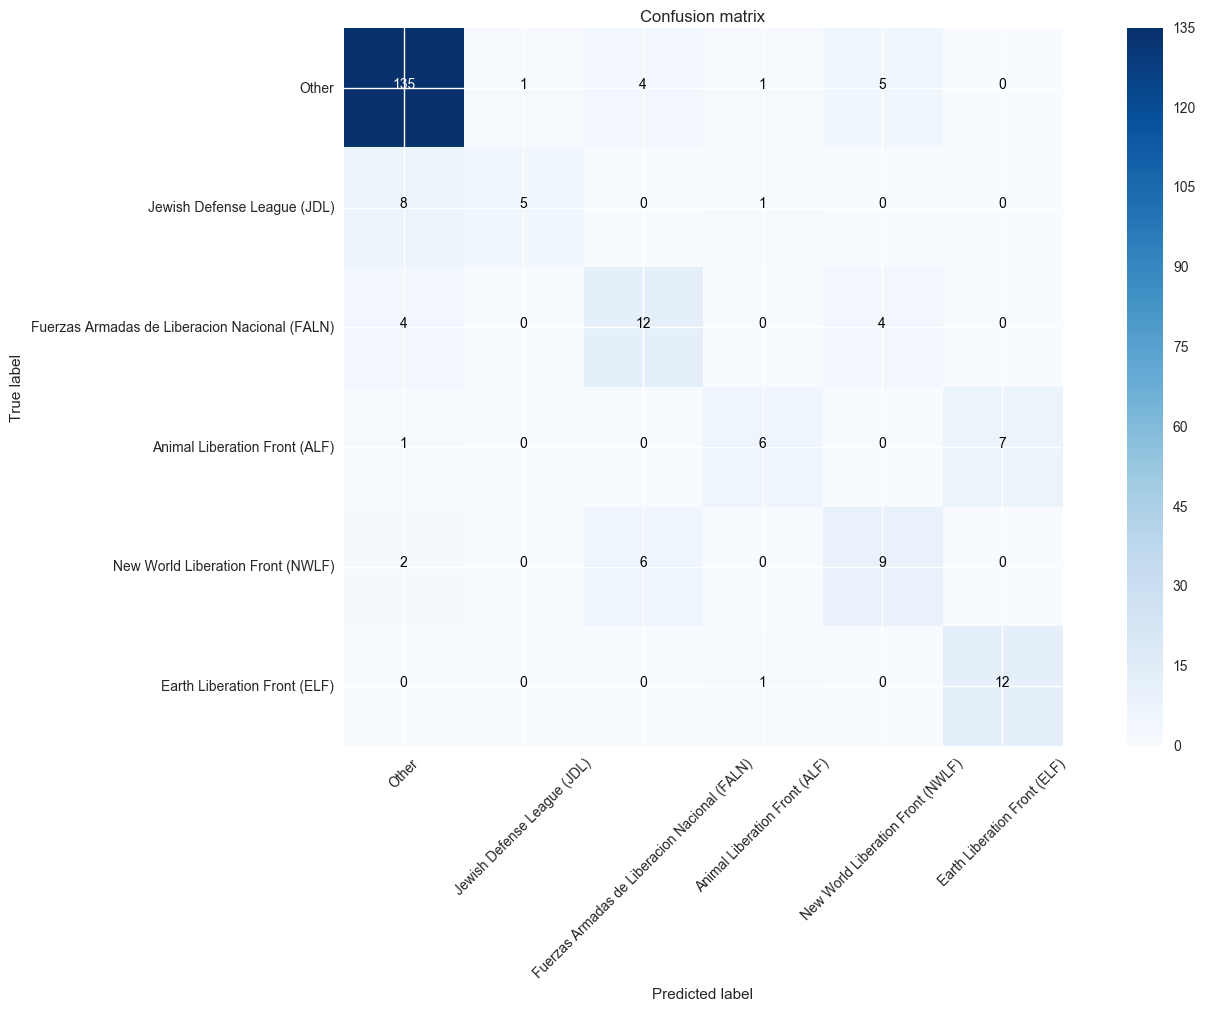

South America
Confusion matrix, without normalization


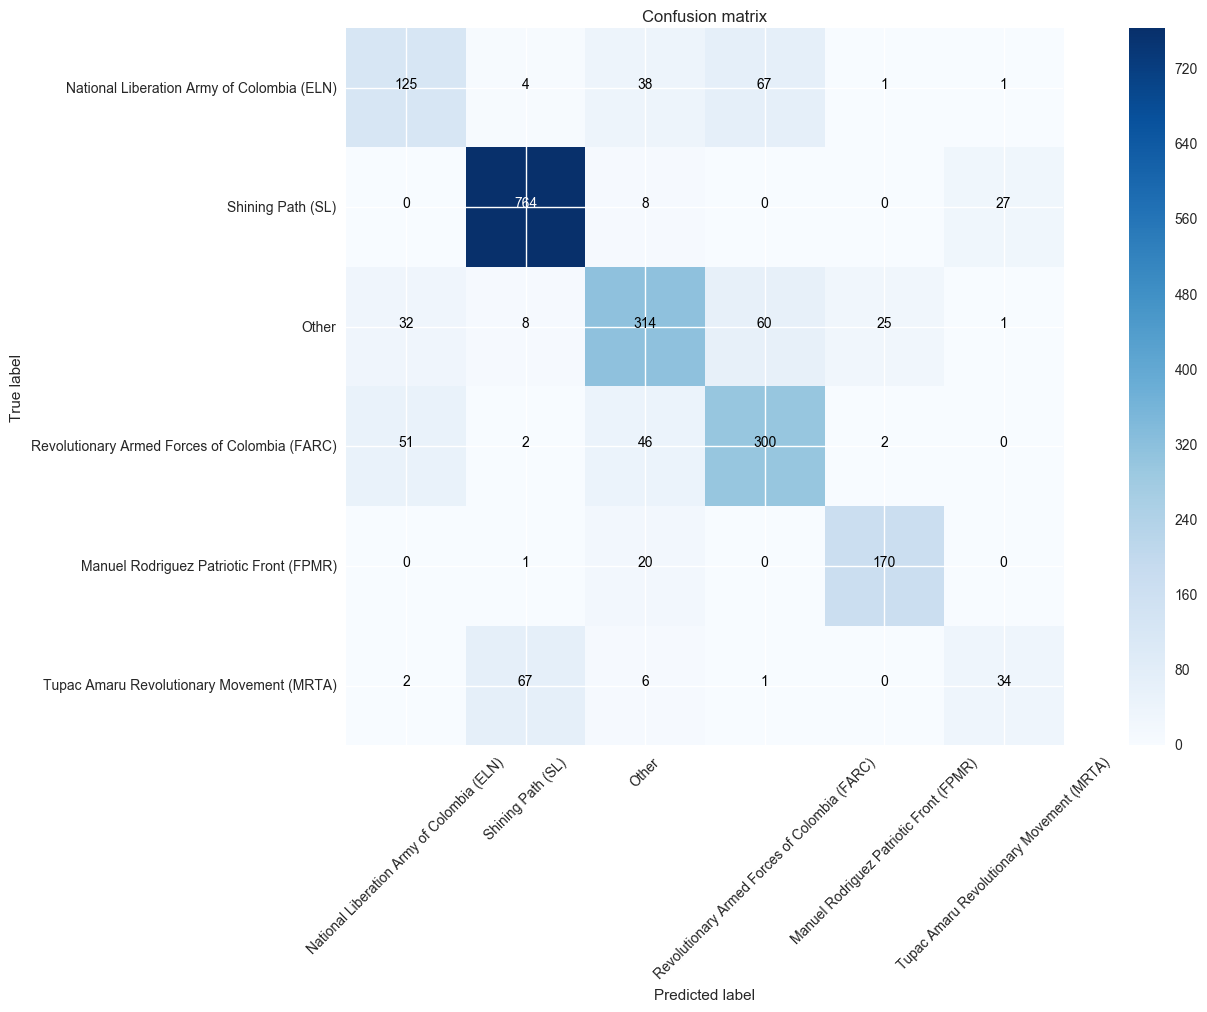

Western Europe
Confusion matrix, without normalization


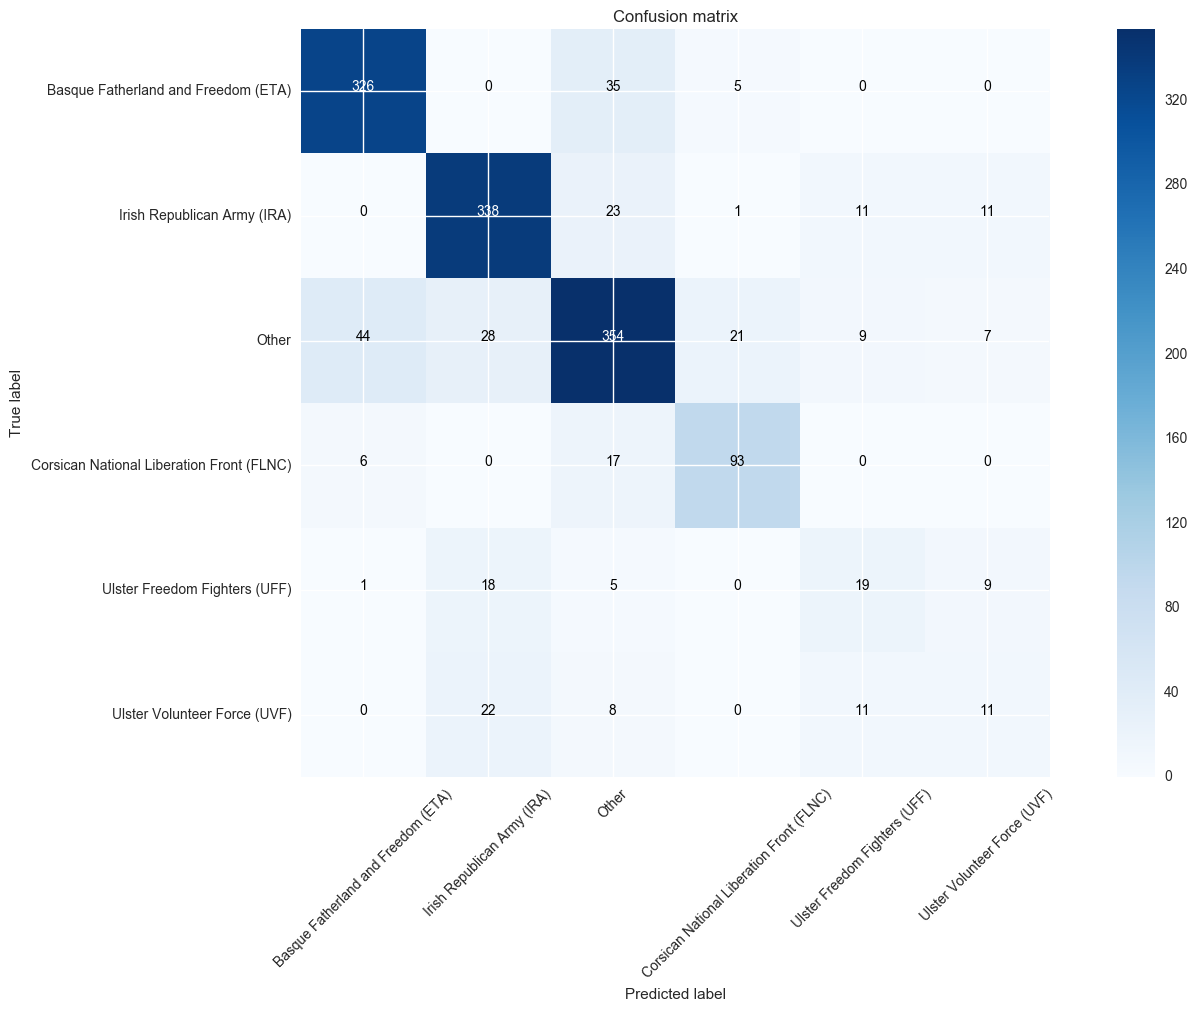

Central America & Caribbean
Confusion matrix, without normalization


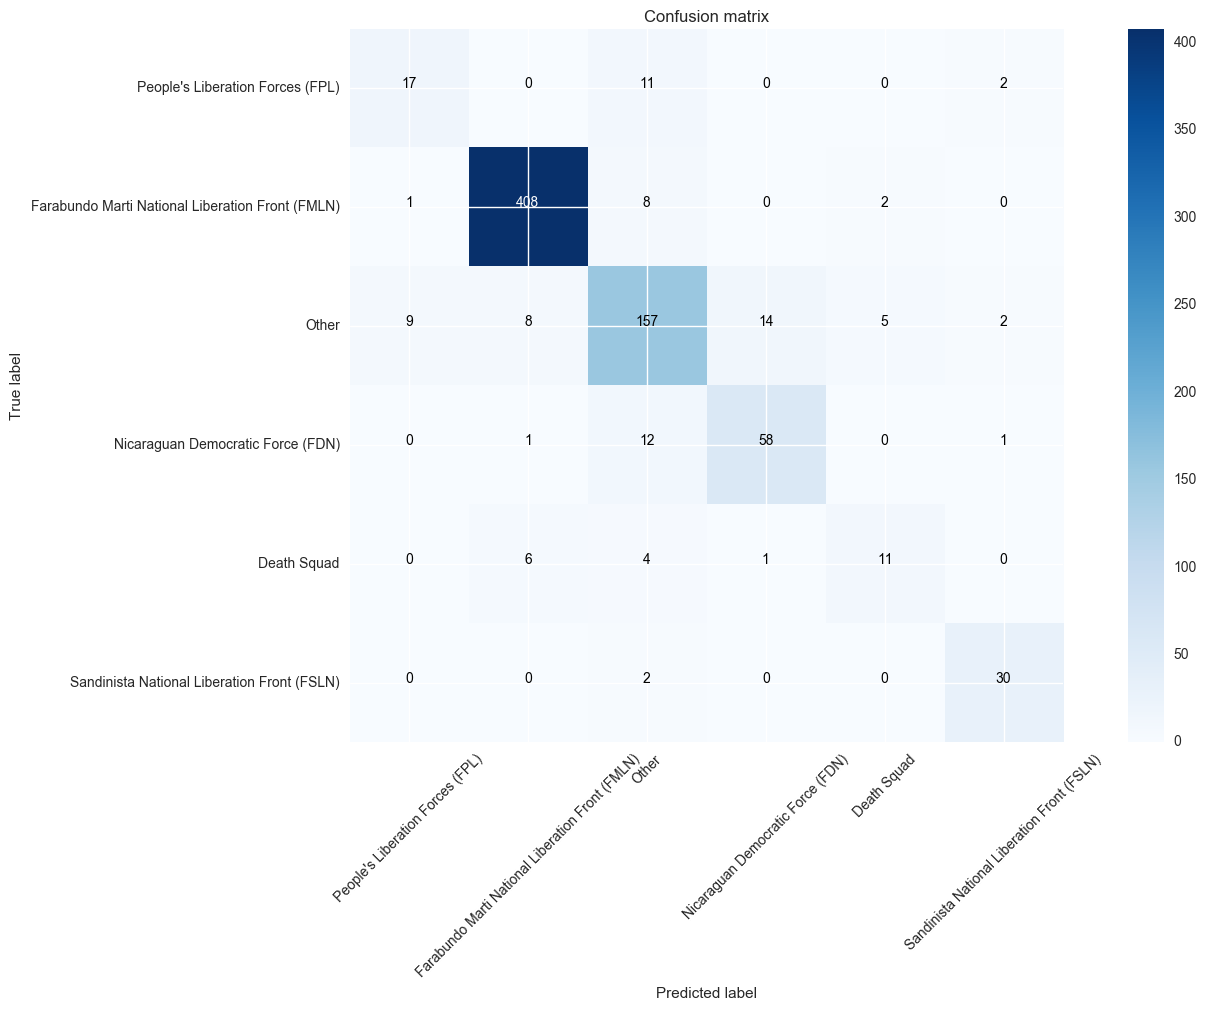

Sub-Saharan Africa
Confusion matrix, without normalization


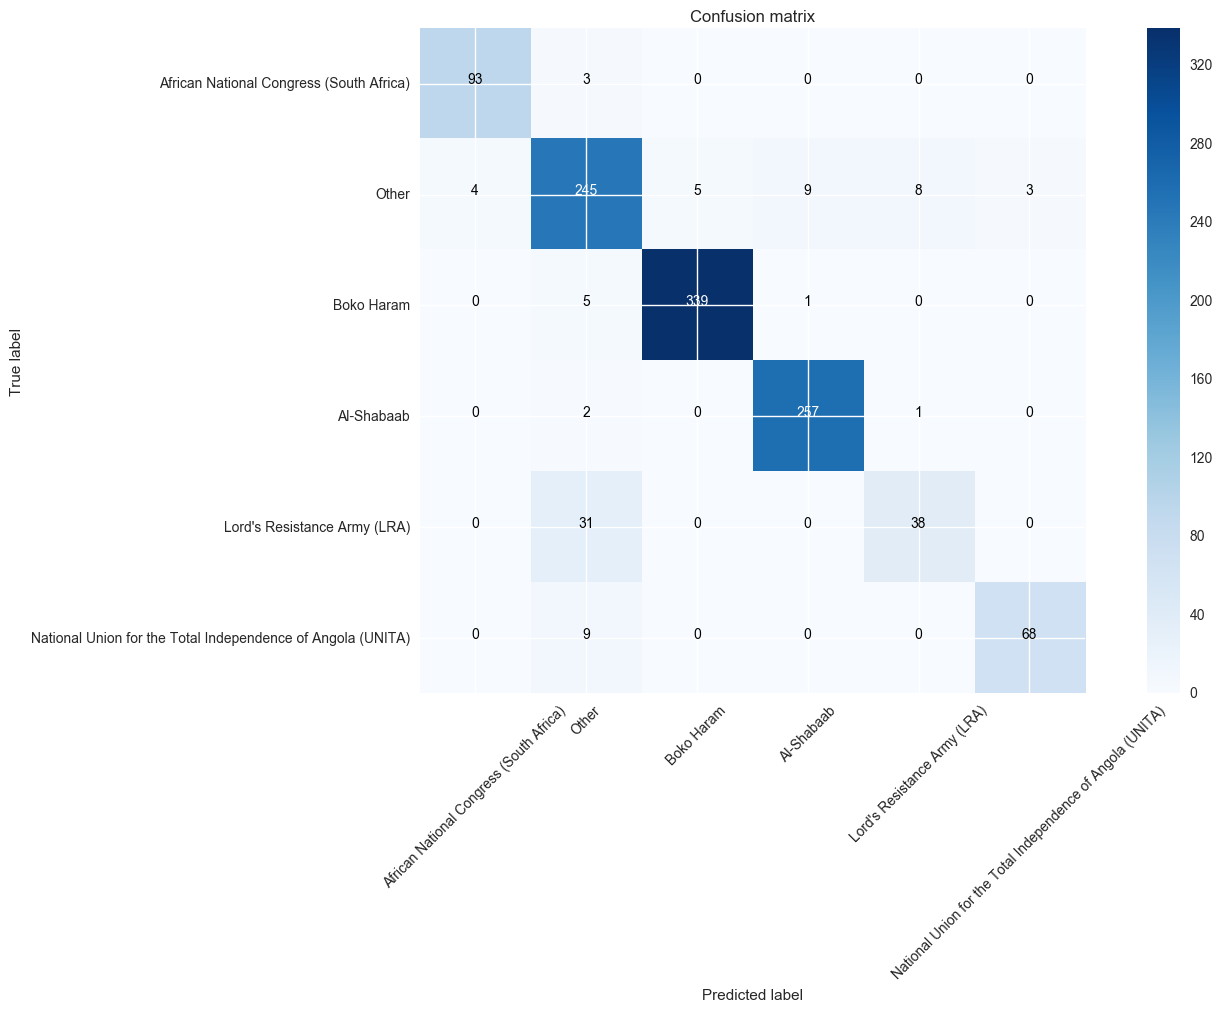

Middle East & North Africa
Confusion matrix, without normalization


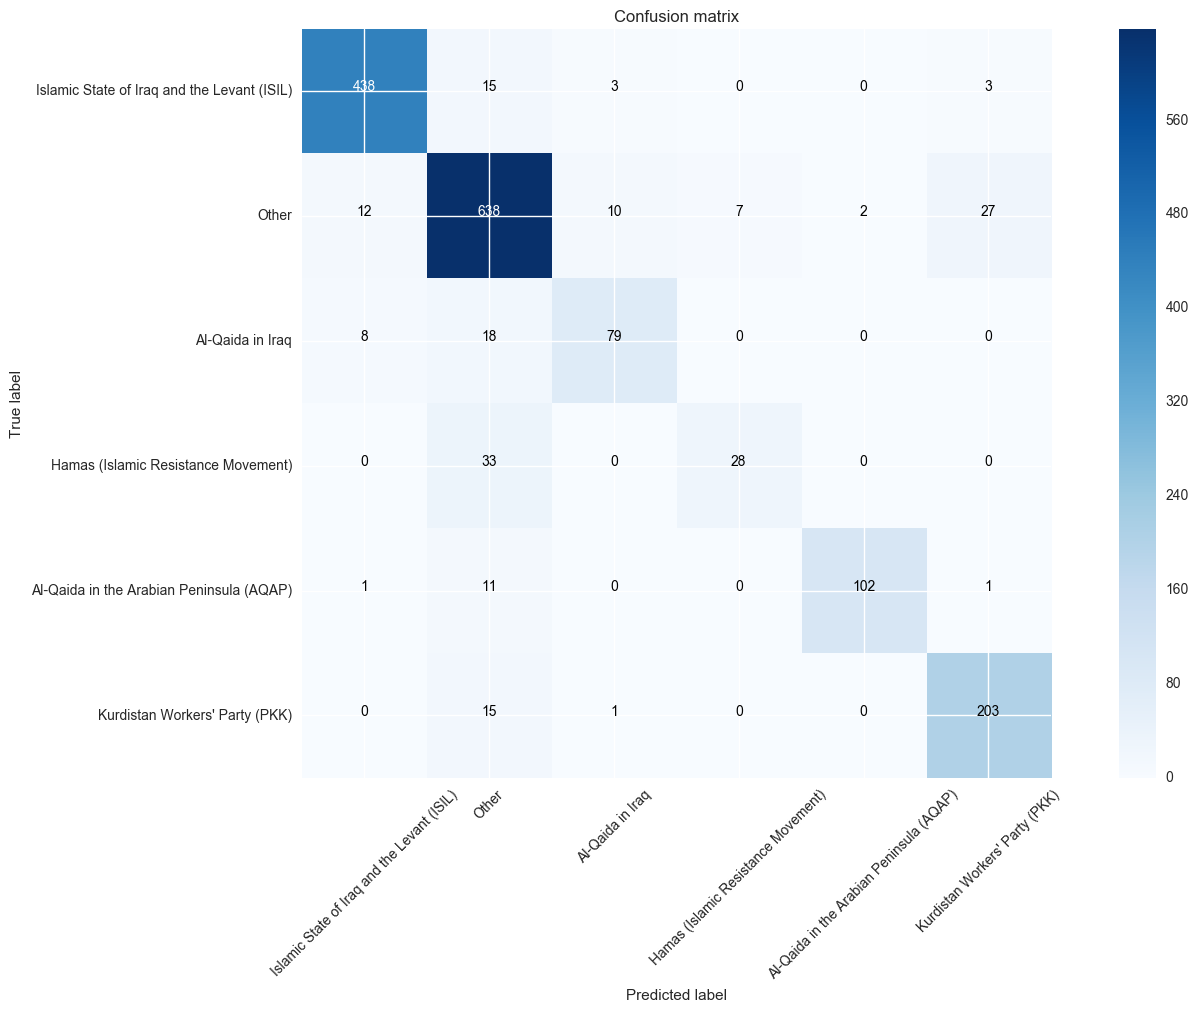

East Asia
Confusion matrix, without normalization


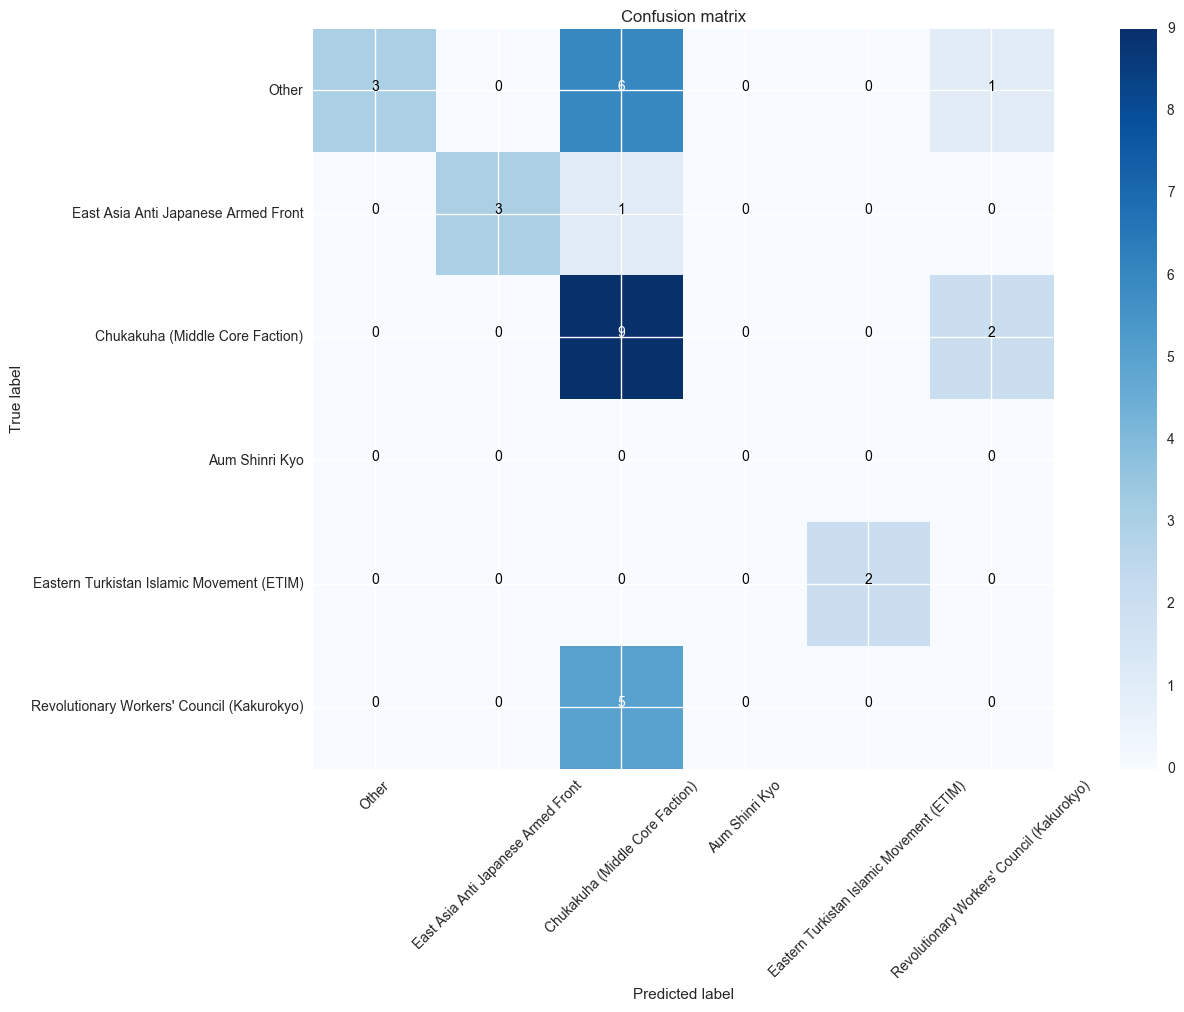

Eastern Europe
Confusion matrix, without normalization


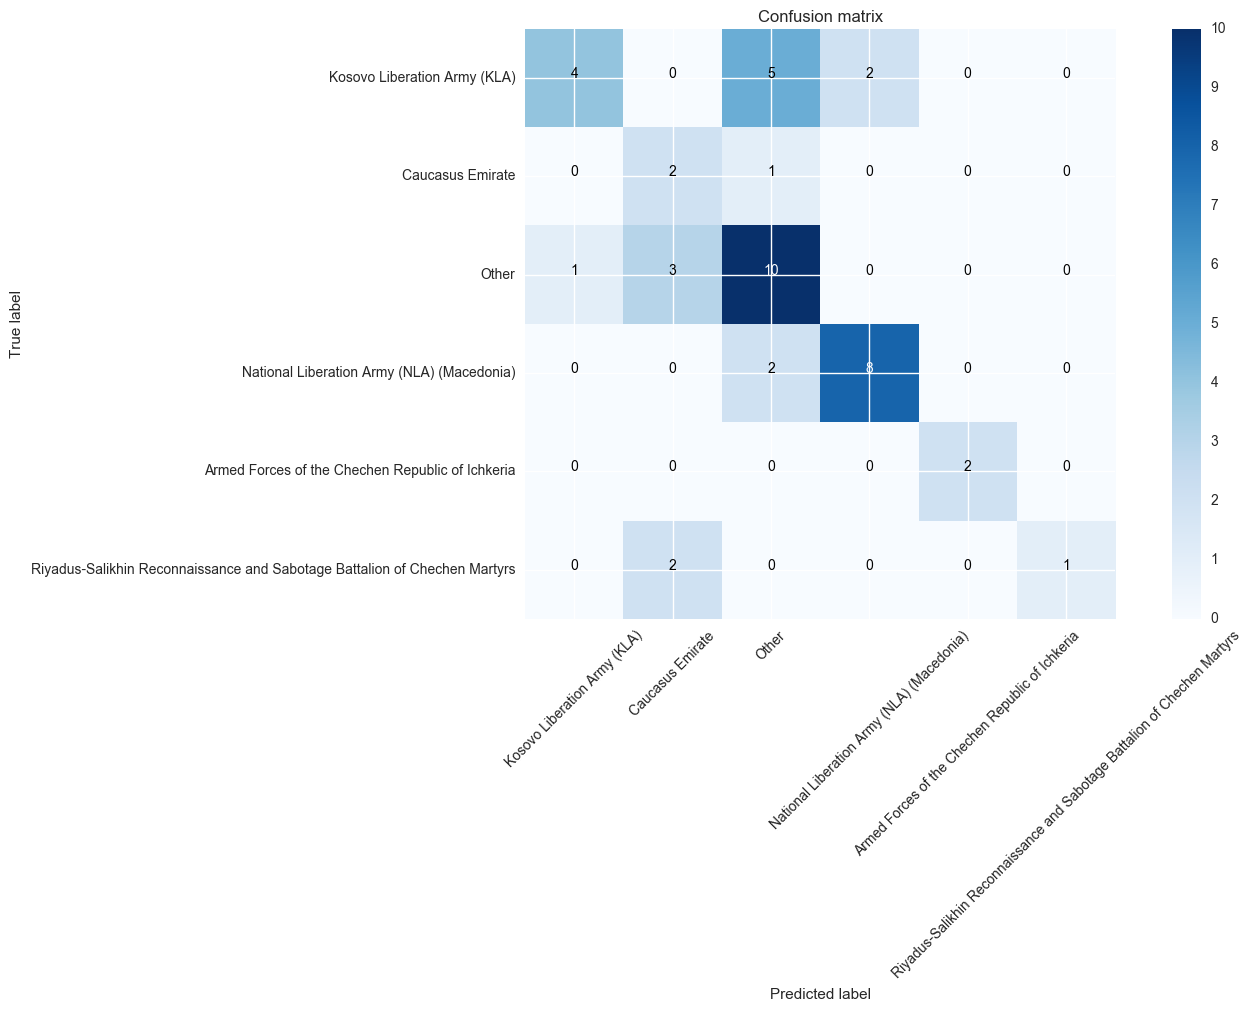

Australasia & Oceania
Confusion matrix, without normalization


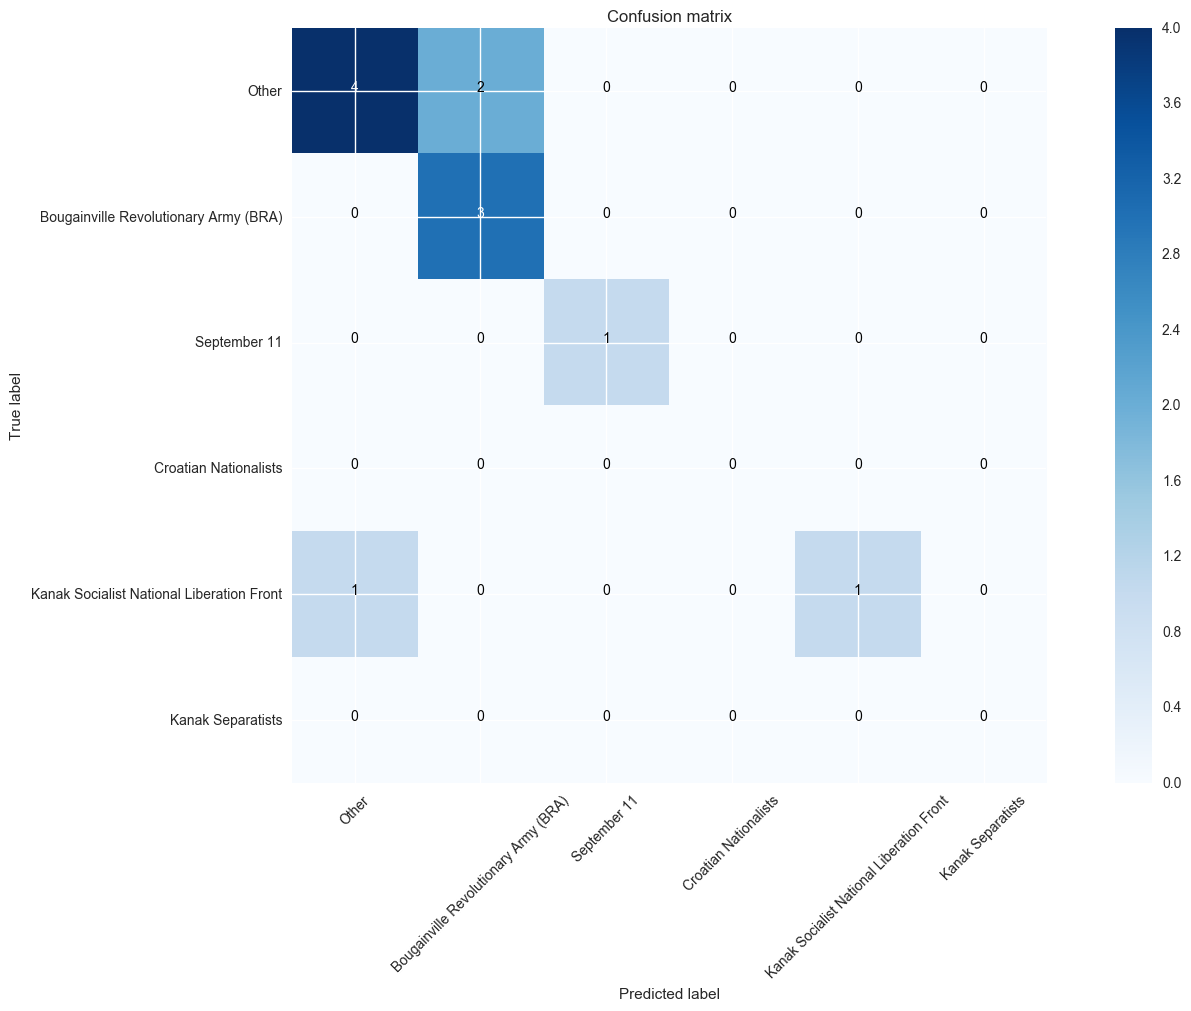

Southeast Asia
Confusion matrix, without normalization


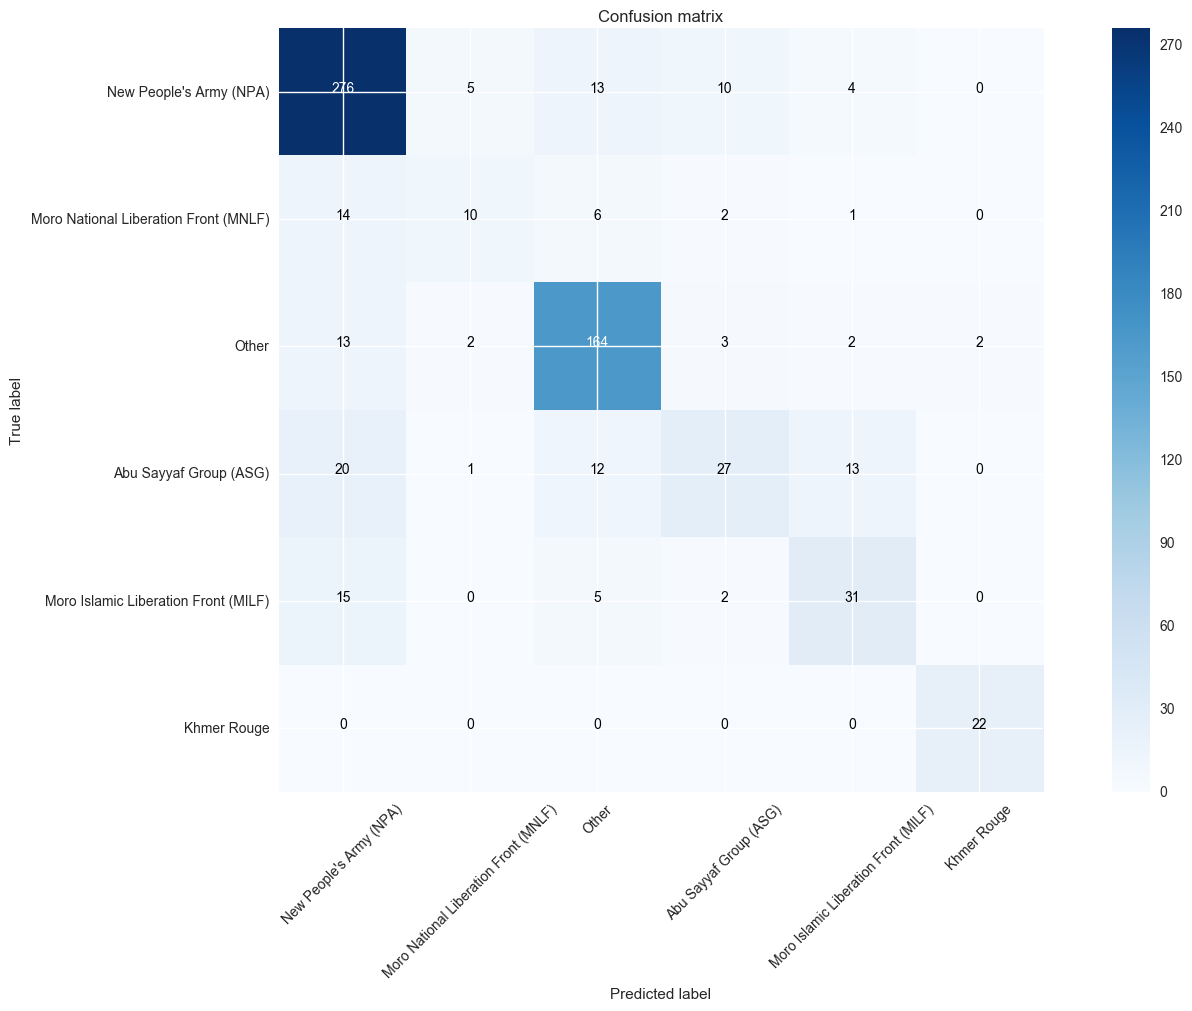

South Asia
Confusion matrix, without normalization


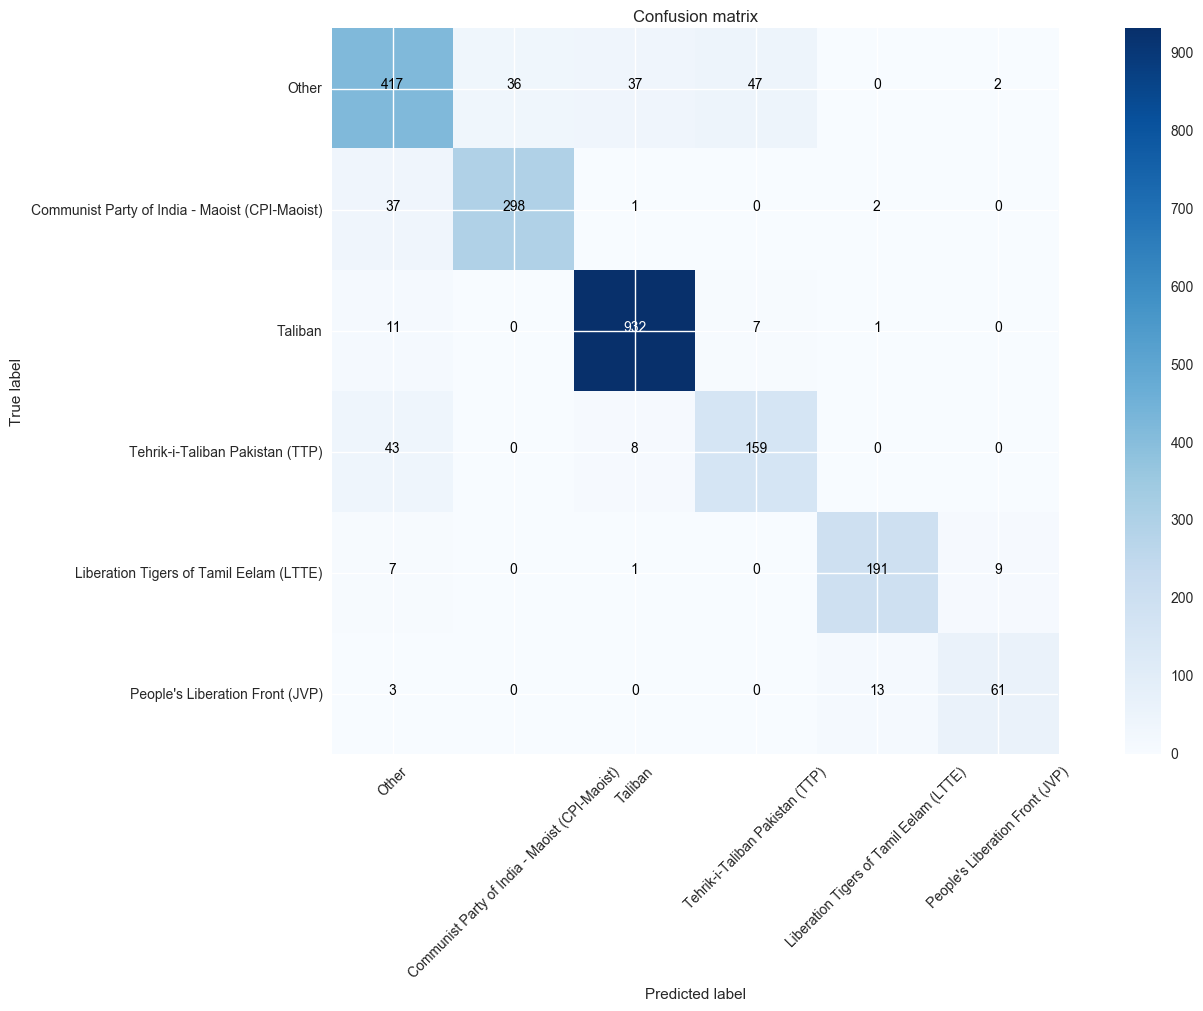

Central Asia
Confusion matrix, without normalization


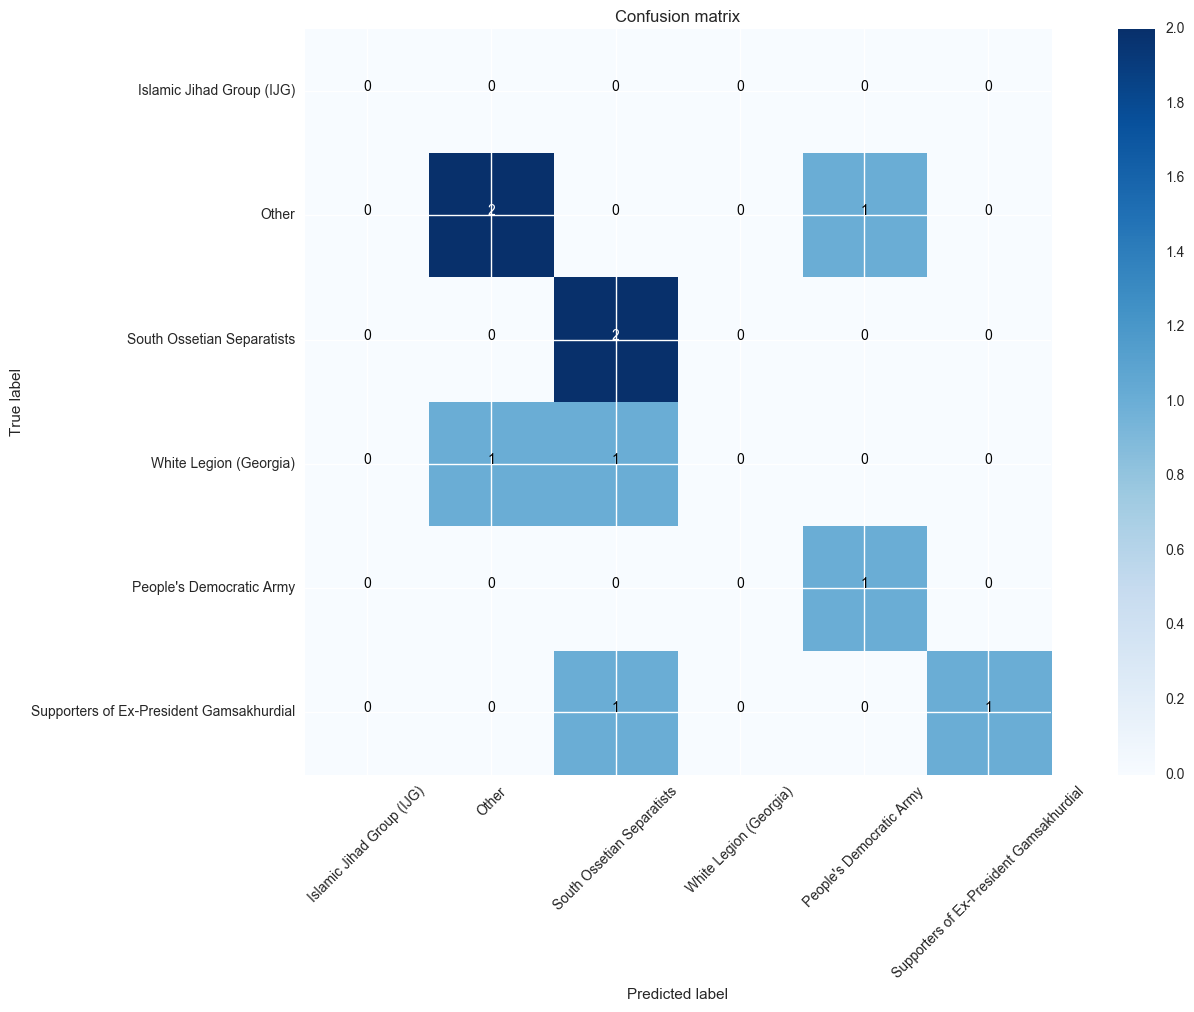

In [19]:
for pred in predictions:
    print(pred[0])
    plt.figure(figsize=(15,10))
    plot_confusion_matrix(confusion_matrix(pred[1],
                                           pred[2],
                                           labels = pred[3]),
                                           classes = pred[3])
    plt.show()


In [13]:
rf = RandomForestClassifier(random_state = 2).fit(X_train, Y_train)

In [14]:
X_train.columns.values

array(['iyear', 'multiple', 'success', 'suicide', 'nperps', 'nperpcap',
       'nkill', 'nwound', 'nhostkid', 'ransomamt', 'ransompaid',
       'nreleased', 'attacktype1_txt_Armed Assault',
       'attacktype1_txt_Assassination',
       'attacktype1_txt_Bombing/Explosion',
       'attacktype1_txt_Facility/Infrastructure Attack',
       'attacktype1_txt_Hijacking',
       'attacktype1_txt_Hostage Taking (Barricade Incident)',
       'attacktype1_txt_Hostage Taking (Kidnapping)',
       'attacktype1_txt_Unarmed Assault', 'attacktype1_txt_Unknown',
       'targtype1_txt_Abortion Related',
       'targtype1_txt_Airports & Aircraft', 'targtype1_txt_Business',
       'targtype1_txt_Educational Institution',
       'targtype1_txt_Food or Water Supply',
       'targtype1_txt_Government (Diplomatic)',
       'targtype1_txt_Government (General)',
       'targtype1_txt_Journalists & Media', 'targtype1_txt_Maritime',
       'targtype1_txt_Military', 'targtype1_txt_NGO',
       'targtype1_txt_Other

In [15]:
rf.feature_importances_

array([ 0.0680773 ,  0.03273898,  0.        ,  0.01607437,  0.03102959,
        0.00070697,  0.03605581,  0.04001237,  0.01227198,  0.0074359 ,
        0.00295617,  0.00864083,  0.07364311,  0.00545792,  0.00293522,
        0.        ,  0.        ,  0.        ,  0.02116284,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00911093,
        0.        ,  0.01958558,  0.04465871,  0.        ,  0.        ,
        0.01771682,  0.03823313,  0.        ,  0.00713275,  0.0300357 ,
        0.        ,  0.        ,  0.00842041,  0.        ,  0.01569299,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00032992,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01673554,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  